In [119]:
# !pip install -U matplotlib numpy sympy scipy numba

In [120]:
from enum import Enum
from typing import Union, Any, Dict, List, Tuple, Literal

import sympy
from sympy import Matrix, latex
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.core.expr import AtomicExpr
from sympy.core.numbers import Integer
import matplotlib.pyplot as plt
from IPython.core.display import Latex

# Практическое занятие 11
# Компьютерный практикум по алгебре на Python
## Линейные операторы на плоскости и в пространстве
### Задание 1.
Написать функцию, составляющую матрицу линейного оператора поворота на alpha градусов или радиан **по** или **против часовой стрелки** на плоскости. Параметры: обязательные - угол поворота, необязательные - тип меры угла (градусы или радианы), направление поворота (по или против часовой стрелки). Значения по умолчанию - против часовой стрелки в радианах.

Использовать полученную функцию для выведения на экран координат векторов, полученных поворотом вектора [1, 2] 

1) на 10, 20, 45 градусов **по  часовой стрелке**

2) на $\pi/3$ радиан **против часовой стрелки**.

In [121]:
class AngleMeasure(Enum):
    Radians = 0
    Degrees = 1

class RotationDir(Enum):
    Clockwise = 0
    Counterclockwise = 1


def create_operator(
    alpha: Union[int, float, AtomicExpr, Any],
    angle_measure: AngleMeasure = AngleMeasure.Radians,
    rotation_direction: RotationDir = RotationDir.Counterclockwise
) -> Matrix:
    assert isinstance(angle_measure, AngleMeasure)
    assert isinstance(rotation_direction, RotationDir)
    
    alpha = sympy.S(alpha)
    if angle_measure == AngleMeasure.Degrees:
        alpha = sympy.Rational(alpha, 180) * Pi
        
    if rotation_direction == RotationDir.Clockwise:
        alpha = -alpha

    return Matrix([
        [Cos(alpha), -Sin(alpha)],
        [Sin(alpha), Cos(alpha)]
    ])

def rotate_vector(vector: Matrix, operator: Matrix) -> Matrix:
    rotated_vec = operator * vector
    display(Latex(f"\\text{{Rotated Vector x = }}{latex(rotated_vec[0])}"))
    display(Latex(f"\\text{{Rotated Vector y = }}{latex(rotated_vec[1])}"))
    print()
    return rotated_vec

if __name__ == "__main__":
    vec = Matrix([1, 2])
    e1 = Matrix([1, 0])
    e2 = Matrix([0, 1])

    for angle in (10, 20, 45):
        A = create_operator(angle, AngleMeasure.Degrees, RotationDir.Clockwise)
        rotate_vector(vec, A)

    A = create_operator(Pi/3)
    rotate_vector(vec, A)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Найти собственные числа и собственные векторы линейного оператора, заданного матрицей 
$$
\left(\begin{matrix}
-34&20&-5\\
-40&56&-20\\
20&-8&50
\end{matrix}\right)
$$
Воспользоваться eigenvals и eigenvects, проверить выполнение равенства нулю характеристического многочлена $|A-\lambda E|$ и условия $Ax=\lambda x$.


In [122]:
A = Matrix([
    [-34, 20, -5],
    [-40, 56, -20],
    [20, -8, 50]
])

vals: Union[List, Dict] = A.eigenvals()
res: List[Tuple[Any, Any, List]] = A.eigenvects()
for lamb, mult, vectors in res:
    x = vectors[0]
    display(Latex(f"\\lambda = {lamb} \\\\ vector = {latex(x)}"))

    eq_det = (A - lamb * sympy.eye(3)).det()
    assert eq_det == 0 and A*x == lamb * x        

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 3.
Построить матрицу оператора из задания 2 в базисе из векторов $(1,1,1)$, $(0,5,3)$ и $(1,6,0)$.


In [123]:
P = Matrix([
    [1, 0, 1],
    [1, 5, 6],
    [1, 3, 0]
])
assert P.det() != 0

A_new = P**(-1) * A * P
display(Latex(f"A_{{new}} = {latex(A_new)}"))

<IPython.core.display.Latex object>

### Задание 4.
Построить матрицу оператора из задания 2 в базисе из собственных векторов с помощью eigenvects и матрицы перехода. Сравнить диагональные элементы с собственными числами.

In [124]:
res: List[Tuple[Any, Any, List]] = A.eigenvects()
lambdas: List[Integer] = [tup[0] for tup in res]

P = Matrix()
for tup in res:
    P = P.row_join(tup[2][0])
assert P.det() != 0

A_new = P**(-1) * A * P
display(Latex(f"A_{{new}} = {latex(A_new)}"))
display(Latex(f"lambdas = {latex(', '.join(map(latex, lambdas)))}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# Задание 5*
Изобразить на графике вектор [1, 2] из Задания 1 и результаты его поворота (по Заданию 1). В легенде графика для каждого вектора, кроме [1, 2] указать матрицу поворота, а для [1, 2] единичную матрицу.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

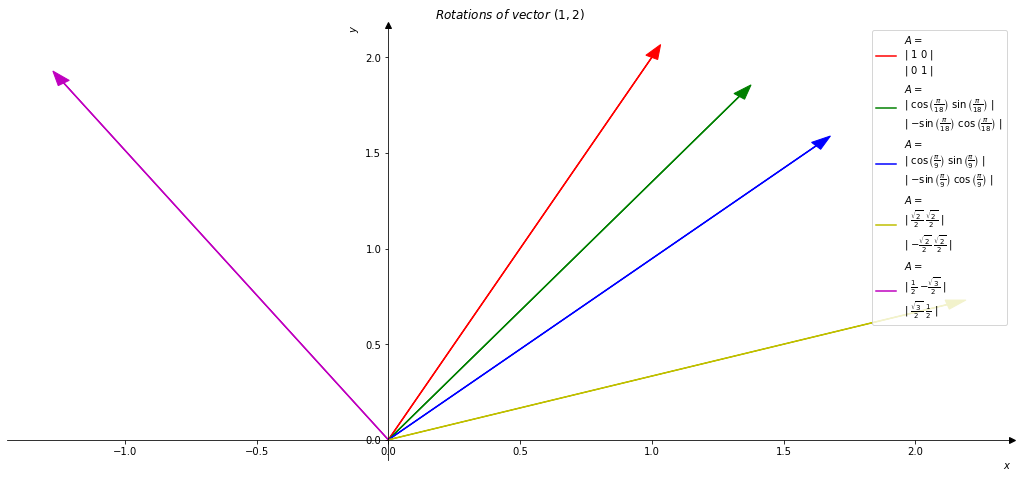

In [125]:
def config_gca():
    gca = plt.gca()
    plt.rcParams["figure.figsize"] = [18, 8]
    gca.set_title("$Rotations$ $of$ $vector$ $(1, 2)$")
    gca.legend(loc="upper right")
    gca.spines["right"].set_color("none")
    gca.spines["top"].set_color("none")
    gca.spines["bottom"].set_position(("data", 0))
    gca.spines["left"].set_position(("data", 0))
    gca.set_ylabel("$y$", loc="top")
    gca.set_xlabel("$x$", loc="right")
    gca.plot(1, 0, "k>", transform=gca.get_yaxis_transform(), clip_on=False)
    gca.plot(0, 1, "^k", transform=gca.get_xaxis_transform(), clip_on=False)

def plot_vector(vector: Matrix, **kwds) -> None:
    x = vector[0]
    y = vector[1]
    gca = plt.gca()
    gca.plot([0, x], [0, y], **kwds)
    kwds.pop("label", None)
    gca.arrow(0, 0, float(x), float(y), head_width=0.05, **kwds)

def to_string(m: Matrix) -> str:
    assert isinstance(m, Matrix)
    cell_converter = lambda s: '$' + latex(s) + '$'
    return '\n'.join(["| " + ' '.join(map(cell_converter, m[i,:])) + " |" for i in range(m.rows)])

def from_degrees_to_rad(alpha: Union[int, float, AtomicExpr, Any]) -> Union[AtomicExpr, Any]:
    return sympy.S(alpha) * Pi / 180.0

vec = Matrix([1, 2])
e1 = Matrix([1, 0])
e2 = Matrix([0, 1])

plot_params: Tuple[Tuple[Union[int, AtomicExpr], AngleMeasure, RotationDir, Literal['r', 'g', 'b', 'y', 'm']], ...] = (
    (0, AngleMeasure.Radians, RotationDir.Counterclockwise, 'r'),
    (10, AngleMeasure.Degrees, RotationDir.Clockwise, 'g'),
    (20, AngleMeasure.Degrees, RotationDir.Clockwise, 'b'),
    (45, AngleMeasure.Degrees, RotationDir.Clockwise, 'y'),
    (Pi/3, AngleMeasure.Radians, RotationDir.Counterclockwise, 'm')
)

for angle, angle_measure, rotation_dir, color in plot_params:
    A = create_operator(angle, angle_measure, rotation_dir)
    rotated_vector = rotate_vector(vec, A)
    
    if isinstance(angle, (int, float)):
        angle = from_degrees_to_rad(angle)
    
    plot_vector(rotated_vector, color=color, label=f"$A = $\n{to_string(A)}")

config_gca()

###  Индивидуальное задание
Найти собственные числа и собственные векторы линейного оператора. Построить матрицу оператора в заданном базисе. Построить матрицу оператора в базисе из собственных векторов.

Вывести на экран матрицу оператора А, матрицу перехода к базису ($e_1$, $e_2$, $e_3$), матрицу оператора в базисе ($e_1$, $e_2$, $e_3$), матрицу перехода к базису из собственных векторов, матрицу оператора в базисе из собственных векторов.

Матрица оператора A, векторы базиса $e_1$, $e_2$, $e_3$:
$$
A = \left(
\begin{matrix}
48 & -12 & -4\\
-40 & 44 & -8\\
50 & 30 & 78
\end{matrix}\right),
\quad 
e_1 = \left(
\begin{matrix}
2\\ -1\\ 3
\end{matrix}
\right)
\quad 
e_2 = 
\left(\begin{matrix}
2\\ 0\\ -3
\end{matrix}\right)
\quad 
e_3 = 
\left(\begin{matrix}
5\\ 1\\ -2
\end{matrix}\right)
$$

Вариант N 50

$$A = \left[\begin{matrix}182 & 144 & -108\\-156 & -124 & 92\\96 & 78 & -54\end{matrix}\right],\quad e_1 = \left[\begin{matrix}1\\-3\\2\end{matrix}\right],\quad e_2 = \left[\begin{matrix}3\\-3\\1\end{matrix}\right],\quad e_3 = \left[\begin{matrix}3\\1\\-2\end{matrix}\right]$$

In [126]:
A = Matrix([
    [182, 144, -108],
    [-156, -124, 92],
    [96, 78, -54]
])
e1 = Matrix([1, -3, 2])
e2 = Matrix([3, -3, 1])
e3 = Matrix([3, 1, -2])

P_in_e = e1.row_join(e2).row_join(e3)
assert P_in_e.det() != 0
A_new_in_e = P_in_e**(-1) * A * P_in_e

P_in_self_A = Matrix()
for lamb, mult, vectors in A.eigenvects():
    P_in_self_A = P_in_self_A.row_join(vectors[0])
assert P_in_self_A.det() != 0
A_new_in_self_A = P_in_self_A**(-1) * A * P_in_self_A

display(Latex(f"\\text{{A = }}{latex(A)}"))
display(Latex(f"\\text{{Матрица перехода к базису ($e_1$, $e_2$, $e_3$)}}{latex(P_in_e)}"))
display(Latex(f"\\text{{Матрица A оператора в базисе ($e_1$, $e_2$, $e_3$)}}{latex(A_new_in_e)}"))
display(Latex(f"\\text{{Матрица перехода к базису из собственных векторов}}{latex(P_in_self_A)}"))
display(Latex(f"\\text{{Матрица оператора A в базисе из вобственных векторов: }}{latex(A_new_in_self_A)}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>